# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Analysis on Datasets for Classification

# Classification Dataset #5

# Importing Libraraies

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', 500)

from lazypredict.Supervised import LazyClassifier


## Getting Dataeset

In [7]:
df=pd.read_csv('wifi_localization.csv',sep='\t',names=[0,1,2,3,4,5,6,7])
print(df.shape)
df.head()

(2000, 8)


,0,1,2,3,4,5,6,7
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [8]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [9]:
df_c=df.copy()

In [10]:
df[7].value_counts()

1    500
2    500
3    500
4    500
Name: 7, dtype: int64

In [11]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

#### Changing the target label class into 1 and zero

In [12]:
def f1(v):
    if v==1 or v==2:
        return(0)
    elif v==3 or v==4:
        return(1)

df[7]=df[7].apply(f1)

df.head()

,0,1,2,3,4,5,6,7
0,-64,-56,-61,-66,-71,-82,-81,0
1,-68,-57,-61,-65,-71,-85,-85,0
2,-63,-60,-60,-67,-76,-85,-84,0
3,-61,-60,-68,-62,-77,-90,-80,0
4,-63,-65,-60,-63,-77,-81,-87,0


In [13]:
df[7].value_counts()

0    1000
1    1000
Name: 7, dtype: int64

### Data set details

### Dataset Title: Wireless Indoor Localization Data Set

Collected to perform experimentation on how wifi signal strengths can be used to determine one of the indoor locations.

The data was obtained from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization



#### Attribute Information:


Each attribute is wifi signal strength observed on smartphone

## EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
 1   1       2000 non-null   int64
 2   2       2000 non-null   int64
 3   3       2000 non-null   int64
 4   4       2000 non-null   int64
 5   5       2000 non-null   int64
 6   6       2000 non-null   int64
 7   7       2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [15]:
df.describe()

,0,1,2,3,4,5,6,7
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,-52.33,-55.62,-54.96,-53.57,-62.64,-80.98,-81.73,0.50
std,11.32,3.42,5.32,11.47,9.11,6.52,6.52,0.50
min,-74.00,-74.00,-73.00,-77.00,-89.00,-97.00,-98.00,0.00
25%,-61.00,-58.00,-58.00,-63.00,-69.00,-86.00,-87.00,0.00
50%,-55.00,-56.00,-55.00,-56.00,-64.00,-82.00,-83.00,0.50
75%,-46.00,-53.00,-51.00,-46.00,-56.00,-77.00,-78.00,1.00
max,-10.00,-45.00,-40.00,-11.00,-36.00,-61.00,-63.00,1.00


[None, None, None, None, None, None, None, None, None]

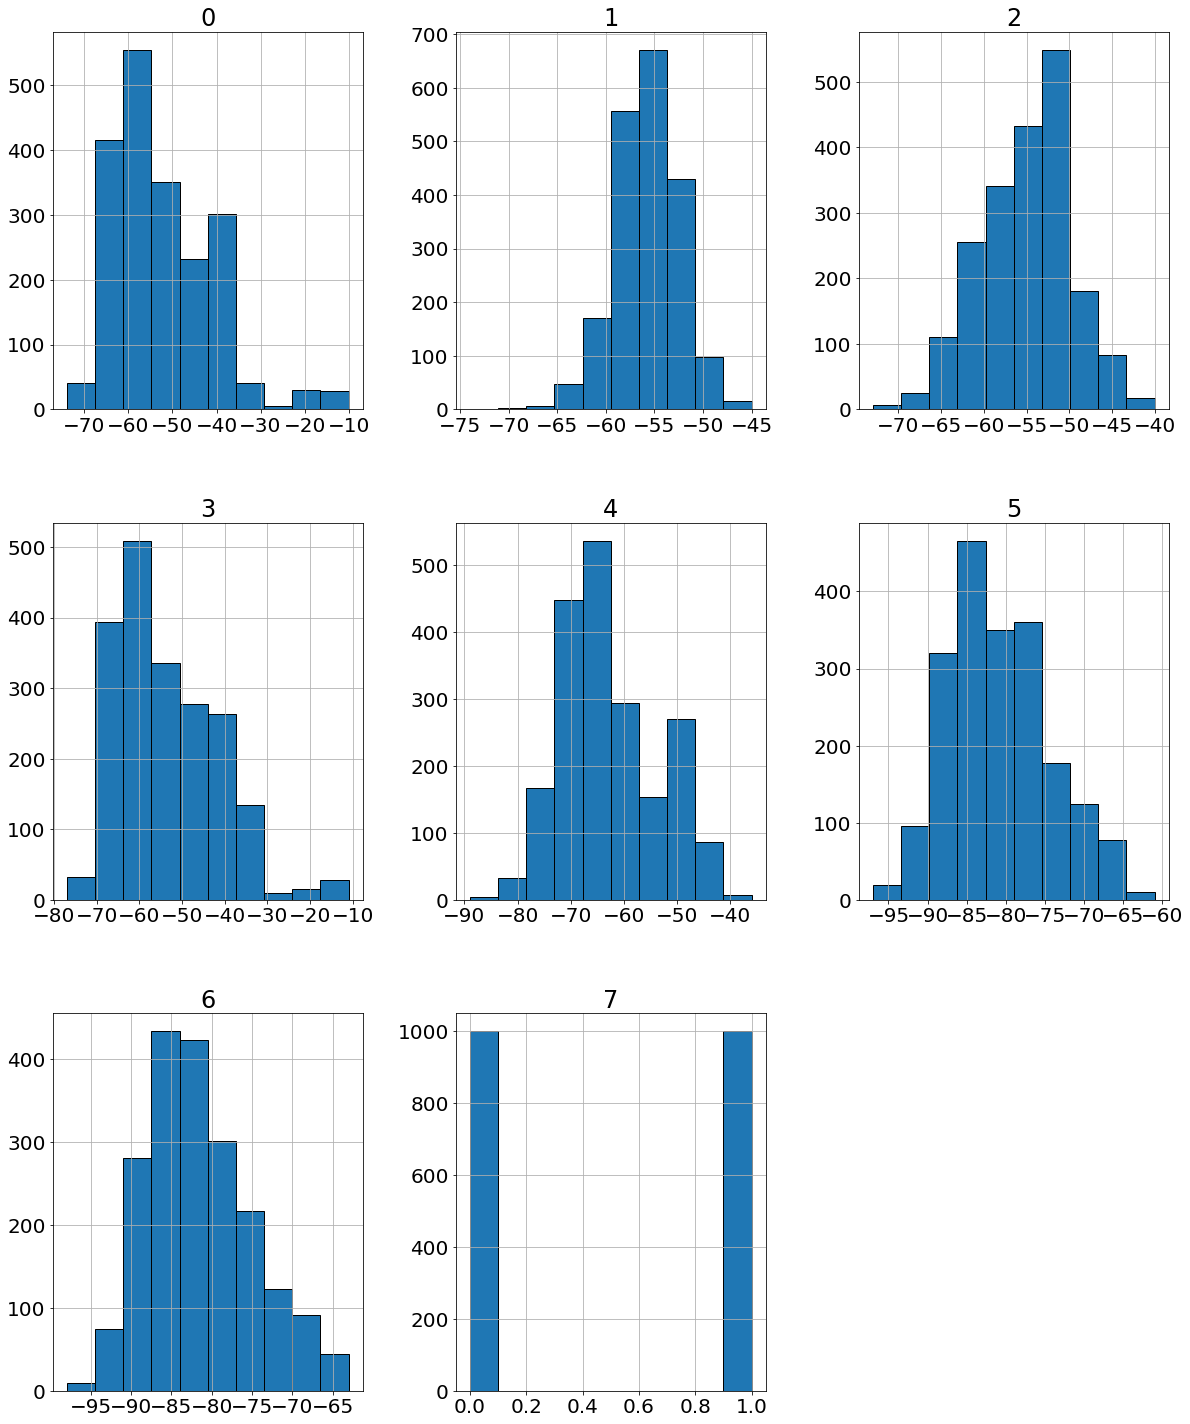

In [16]:
%matplotlib inline
# fig = plt.figure(figsize = (20,25))
# ax = fig.gca()
# df.hist(ax=ax)

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(24) for x in fig.ravel()]


All the features are highly skewed

In [17]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

#### Dropping the NaN values

In [18]:
print(df.shape)
df=df.dropna()
df.shape

(2000, 8)


(2000, 8)

#### Applying standard scaling

In [19]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X2_Scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X2_Scaled)
df_scaled.columns = df.columns


#### We will do further all analysis on this dataset with logtransformation

In [20]:
df.corr()

,0,1,2,3,4,5,6,7
0,1.00,-0.00,0.05,0.92,-0.24,0.72,0.69,-0.23
1,-0.00,1.00,0.28,0.01,0.20,0.07,0.05,0.17
2,0.05,0.28,1.00,0.08,0.62,-0.09,-0.07,0.61
3,0.92,0.01,0.08,1.00,-0.24,0.71,0.67,-0.21
4,-0.24,0.20,0.62,-0.24,1.00,-0.42,-0.36,0.69
5,0.72,0.07,-0.09,0.71,-0.42,1.00,0.72,-0.49
6,0.69,0.05,-0.07,0.67,-0.36,0.72,1.00,-0.45
7,-0.23,0.17,0.61,-0.21,0.69,-0.49,-0.45,1.00


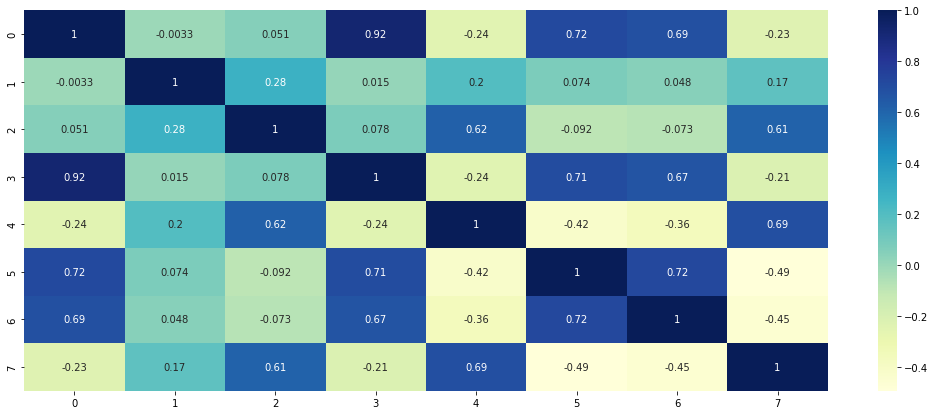

In [21]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection

In [22]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

### for df_scaled

In [23]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [24]:
dfs = pd.DataFrame()

X=df_scaled.drop(columns=[7])
y=df[7]



trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_classif(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingClassifier(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeClassifier(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_scaled.corr()


cor_target = abs(cor[7])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
4,0.33,0.45,0.33,0.43,0.69,2.23
0,0.29,0.42,0.27,0.35,0.23,1.56
2,0.24,0.09,0.19,0.14,0.61,1.27
5,0.17,0.00,0.06,0.02,0.49,0.74
3,0.26,0.02,0.13,0.05,0.21,0.68
6,0.16,0.01,0.02,0.01,0.45,0.65
1,0.03,0.00,0.00,0.00,0.17,0.20


#### for df

In [25]:
dfs = pd.DataFrame()


X=df.drop(columns=[7])
y=df[7]


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df.corr()


cor_target = abs(cor[7])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

# dfs['SVM']=importance_svm

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
4,0.33,0.45,0.35,0.43,0.69,2.25
0,0.28,0.42,0.28,0.36,0.23,1.57
2,0.25,0.09,0.17,0.14,0.61,1.26
5,0.21,0.01,0.07,0.02,0.49,0.81
6,0.19,0.00,0.02,0.01,0.45,0.68
3,0.27,0.02,0.10,0.04,0.21,0.64
1,0.04,0.00,0.00,0.00,0.17,0.21


In [26]:
dfs.shape

(7, 6)

In [27]:
dfs_s=dfs[dfs['sum']>1]
dfs_s.shape

(3, 6)

In [28]:
dfs_s

,MI,Decission_Tree,Random_Forrest,Gradient_Boosting,Correlation_Default,sum
0,0.28,0.42,0.28,0.36,0.23,1.57
2,0.25,0.09,0.17,0.14,0.61,1.26
4,0.33,0.45,0.35,0.43,0.69,2.25


In [29]:
dfs_s.index

Int64Index([0, 2, 4], dtype='int64')

### chosing the best top 3 features

In [30]:
# df_t=df[dfs_s.index]

df_ts=df_scaled[dfs_s.index] # scaled dataset

df_t=df[dfs_s.index] 

# df_tl=df_log[dfs_s.index]

## Making X,y

## Making train and test split

In [31]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [32]:
X.shape

(2000, 7)

#### for df

In [33]:

X=df_t
y=df[7]
# y=df_log['SSPL']

# reduce X,y

reduce= int(X.shape[0] * 0.8)

X,y = X[:reduce], y[:reduce]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 64)



In [34]:
X.shape

(1600, 3)

In [35]:
y_train.shape

(1120,)

In [36]:
X_train.shape

(1120, 3)

#### for df_scaled

In [37]:
Xs=df_ts
ys=df_scaled[7]

# reduce Xs,ys

reduce= int(Xs.shape[0] * 0.8)

Xs,ys = Xs[:reduce], ys[:reduce]


Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.3, random_state = 64)

In [38]:
Xs_train.shape

(1120, 3)

In [39]:
df_t.describe()

,0,2,4
count,2000.00,2000.00,2000.00
mean,-52.33,-54.96,-62.64
std,11.32,5.32,9.11
min,-74.00,-73.00,-89.00
25%,-61.00,-58.00,-69.00
50%,-55.00,-55.00,-64.00
75%,-46.00,-51.00,-56.00
max,-10.00,-40.00,-36.00


In [40]:
df_ts.describe()

,0,2,4
count,2000.00,2000.00,2000.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.91,-3.39,-2.90
25%,-0.77,-0.57,-0.70
50%,-0.24,-0.01,-0.15
75%,0.56,0.75,0.73
max,3.74,2.82,2.93


In [41]:
X.describe()

,0,2,4
count,1600.00,1600.00,1600.00
mean,-50.29,-56.23,-66.06
std,11.70,4.84,6.47
min,-74.00,-73.00,-89.00
25%,-60.00,-59.00,-70.00
50%,-51.00,-56.00,-66.00
75%,-42.00,-53.00,-62.00
max,-10.00,-43.00,-36.00


In [42]:
Xs.describe()

,0,2,4
count,1600.00,1600.00,1600.00
mean,0.18,-0.24,-0.38
std,1.03,0.91,0.71
min,-1.91,-3.39,-2.90
25%,-0.68,-0.76,-0.81
50%,0.12,-0.19,-0.37
75%,0.91,0.37,0.07
max,3.74,2.25,2.93


In [43]:
X_train.shape

(1120, 3)

In [44]:
X_test.shape

(480, 3)

In [45]:
X.shape

(1600, 3)

In [46]:
X_train.shape

(1120, 3)

## Using Lazy predict to rub regression models

### Making prediction on train-test dataset with lazy predict for df

In [47]:

reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)


print(models_1)


100%|██████████| 29/29 [00:00<00:00, 1147.41it/s]

AdaBoostClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
BaggingClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
BernoulliNB model failed to execute
all features must be in [0, 2] or [-3, 0]
CalibratedClassifierCV model failed to execute
all features must be in [0, 2] or [-3, 0]
CategoricalNB model failed to execute
all features must be in [0, 2] or [-3, 0]
DecisionTreeClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
DummyClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
ExtraTreeClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
ExtraTreesClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
GaussianNB model failed to execute
all features must be in [0, 2] or [-3, 0]
KNeighborsClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
LabelPropagation model failed to execute
all features must be in [0, 2] or [

### Lazy predict for df_scaled

In [48]:


reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(Xs_train, Xs_test, y_train, y_test)

# models_1, predictions = reg.fit(X, X, y, y)

print(models_1)



100%|██████████| 29/29 [00:00<00:00, 1147.69it/s]

AdaBoostClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
BaggingClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
BernoulliNB model failed to execute
all features must be in [0, 2] or [-3, 0]
CalibratedClassifierCV model failed to execute
all features must be in [0, 2] or [-3, 0]
CategoricalNB model failed to execute
all features must be in [0, 2] or [-3, 0]
DecisionTreeClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
DummyClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
ExtraTreeClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
ExtraTreesClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
GaussianNB model failed to execute
all features must be in [0, 2] or [-3, 0]
KNeighborsClassifier model failed to execute
all features must be in [0, 2] or [-3, 0]
LabelPropagation model failed to execute
all features must be in [0, 2] or [

#### So we will use dataset without any scaling

### Making a datframe to store results

In [49]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','Accuracy_train','AUC-ROC_train',
                                    'Accuracy_test','AUC-ROC_test','model_details'])

df_results_r1

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details


## Logistic Regression (ML)

### Making prediction on full dataset (no scaling) with Linear Regression on df

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(X_train, y_train)

## for train data

y_p=reg.predict(X_train)
md_probs = reg.predict_proba(X_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


# for test data

y_p=reg.predict(X_test)
md_probs = reg.predict_proba(X_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.9221486698612028
Logistic Regression accuracy for train data :  0.8508928571428571
Logistic Regression AUC-ROC for test data :  0.9066930700231483
Logistic Regression accuracy for test data:  0.8125


In [52]:
df_results_r1

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()


### LR on train test split on df_scaled

In [53]:
from sklearn.linear_model import LinearRegression


# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(Xs_train, y_train)


## for train data

y_p=reg.predict(Xs_train)
md_probs = reg.predict_proba(Xs_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


## for test data

y_p=reg.predict(Xs_test)
md_probs = reg.predict_proba(Xs_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.9221486698612028
Logistic Regression accuracy for train data :  0.8508928571428571
Logistic Regression AUC-ROC for test data :  0.9066930700231483
Logistic Regression accuracy for test data:  0.8125


In [54]:
df_results_r1

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

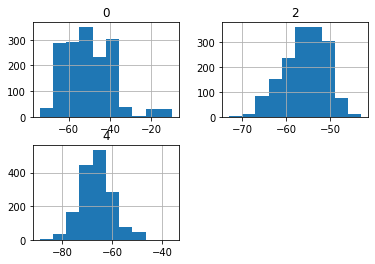

In [55]:
X.hist()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

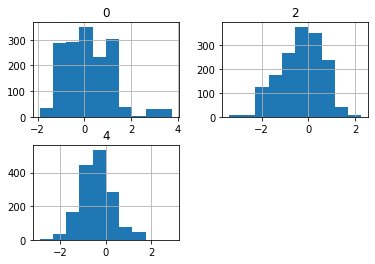

In [56]:
Xs.hist()

#### we will use normal df dataset without any scaling

#### Making variables for pymc models

In [58]:

Xv=X.values
yv=y.values
Xv_train=X_train.values
Xv_test=X_test.values
print(Xv_train.shape,Xv_test.shape)

yv_train=y_train.values
yv_test=y_test.values
print(yv_train.shape,yv_test.shape)


(1120, 3) (480, 3)
(1120,) (480,)


In [59]:
Xs.shape

(1600, 3)

In [60]:
Xsv=Xs.values
ysv=y.values
Xsv_train=Xs_train.values
Xsv_test=Xs_test.values
print(Xsv_train.shape,Xsv_test.shape)

ysv_train=ys_train.values
ysv_test=ys_test.values

(1120, 3) (480, 3)


### making vars for prior for each feature for df

In [61]:
X.columns

Int64Index([0, 2, 4], dtype='int64')

### making vars for prior for each feature for df_scaled

### Selection of priors



## Applying MCMC

#### Note: We have used slice as the starting  sampling method to chose our best prior as it is the fastest sampler and as NUTS was giving chain breaking error

### Doing Logistic Regression using MCMC

In [62]:
yv_train.shape

(1120,)

#### Using generic priors

In [63]:
Xv_train.shape

(1120, 3)

### Generic prior 1

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9217700071601674
Logistic Regression accuracy :  0.8517857142857143
Logistic Regression accuracy for test data :  0.6
Logistic Regression AUC-ROC for test data :  0.6860984519675926


'0.85'

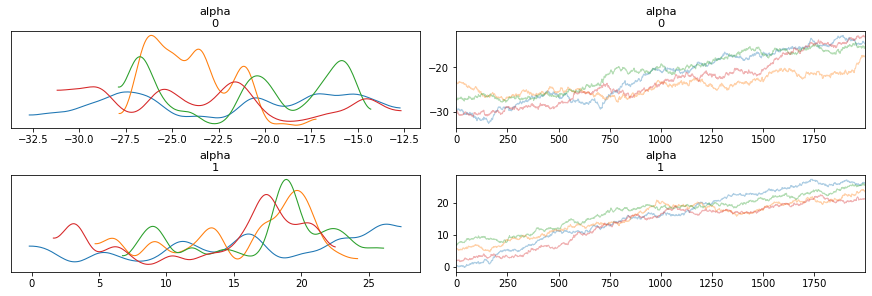

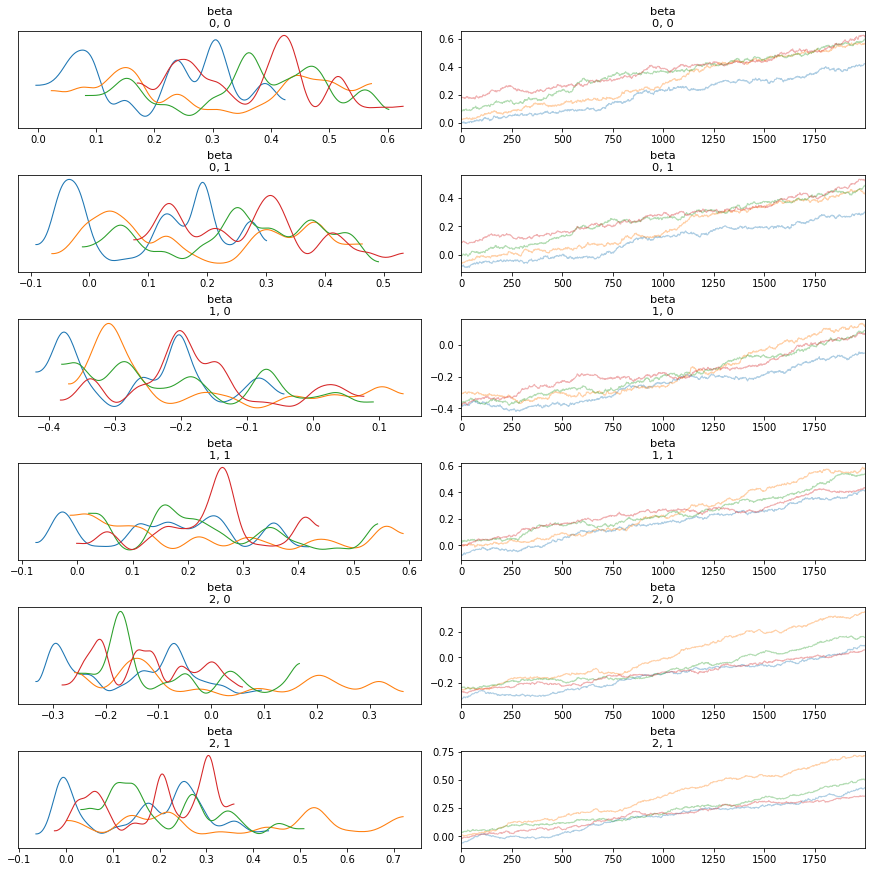

In [64]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=2)
    beta = pm.Normal('beta', mu=0, sd=5, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)


data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train,md_probs)
# md_auc_train = roc_auc_score(yv_train, p,multi_class='ovr')
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]

ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)

f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


In [65]:
df_results_r1

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
2,Logistic Regression-tain/test dataste,Slice,0.85,0.92,0.60,0.69,<pymc3.model.Model object at 0x7f73e44dbe90>


#### Generic piror 2

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9179971497025777
Logistic Regression accuracy :  0.8401785714285714
Logistic Regression accuracy for test data :  0.6
Logistic Regression AUC-ROC for test data :  0.7665020978009259


'0.84'

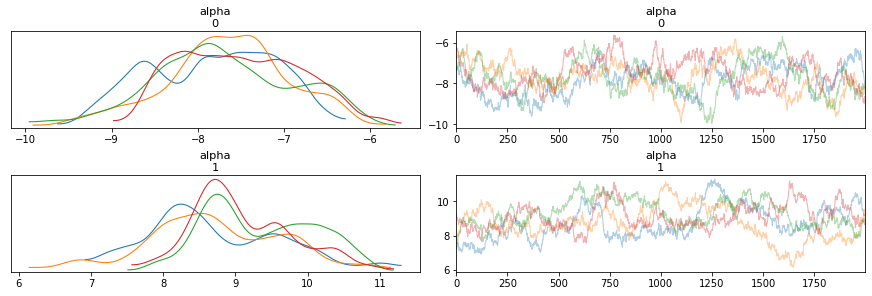

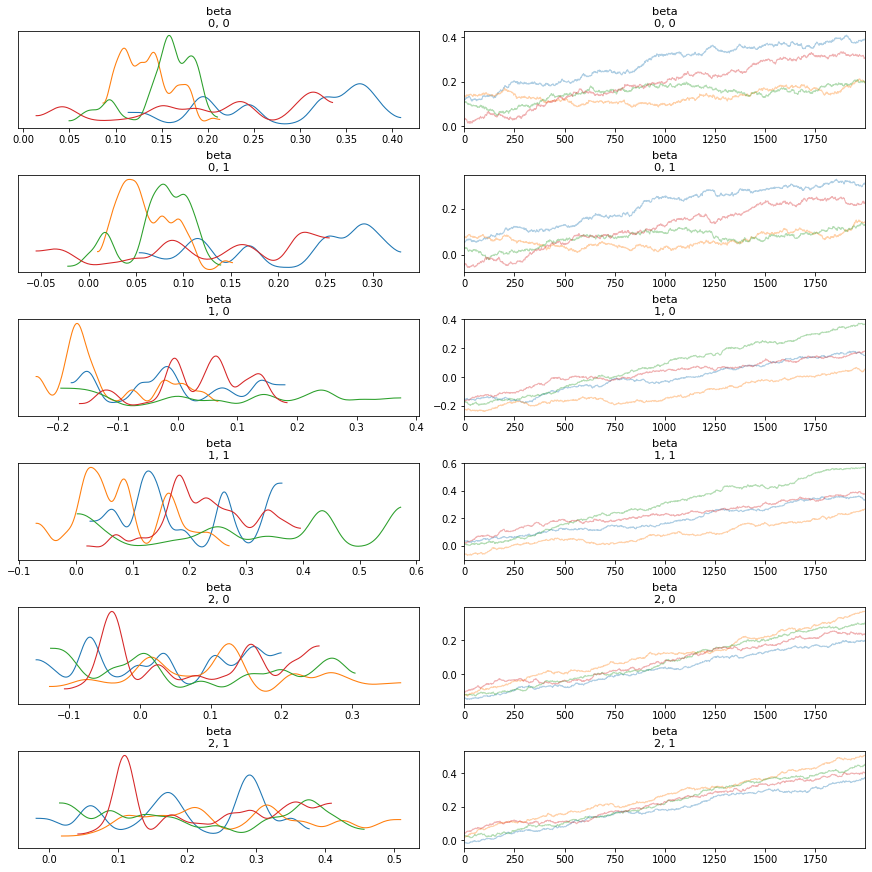

In [66]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]

ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

#### Using specific priors

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

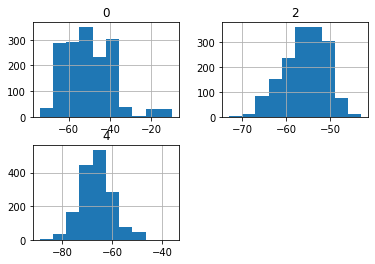

In [67]:
X.hist()

#### the features seem unifrom stable hence we can assume prior normal distribution

In [68]:
X.describe()

,0,2,4
count,1600.00,1600.00,1600.00
mean,-50.29,-56.23,-66.06
std,11.70,4.84,6.47
min,-74.00,-73.00,-89.00
25%,-60.00,-59.00,-70.00
50%,-51.00,-56.00,-66.00
75%,-42.00,-53.00,-62.00
max,-10.00,-43.00,-36.00


In [69]:
y.describe()

count   1600.00
mean       0.38
std        0.48
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: 7, dtype: float64

#### Specific prior 2: with means and standard deviations based on features mean

In [70]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0.5, sd=1, shape=2)
    beta = pm.Normal('beta', mu=-50, sd=15, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)


data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))



dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)


    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 31 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [71]:
Xs.describe()

,0,2,4
count,1600.00,1600.00,1600.00
mean,0.18,-0.24,-0.38
std,1.03,0.91,0.71
min,-1.91,-3.39,-2.90
25%,-0.68,-0.76,-0.81
50%,0.12,-0.19,-0.37
75%,0.91,0.37,0.07
max,3.74,2.25,2.93


### Now applying model on dataset with Standard Scalar transformation

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9178215879048248
Logistic Regression accuracy :  0.8383928571428572
Logistic Regression accuracy for test data :  0.6
Logistic Regression AUC-ROC for test data :  0.8185854311342592


'0.84'

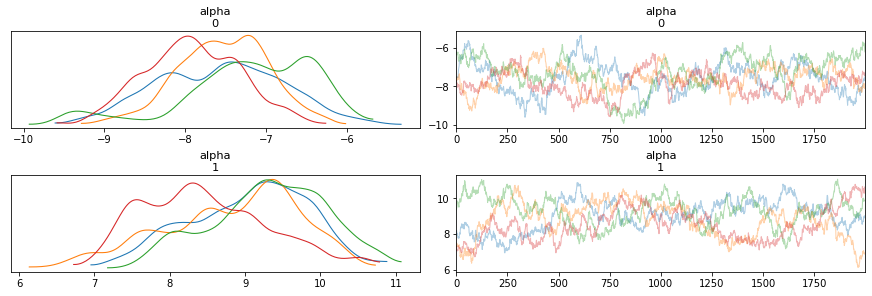

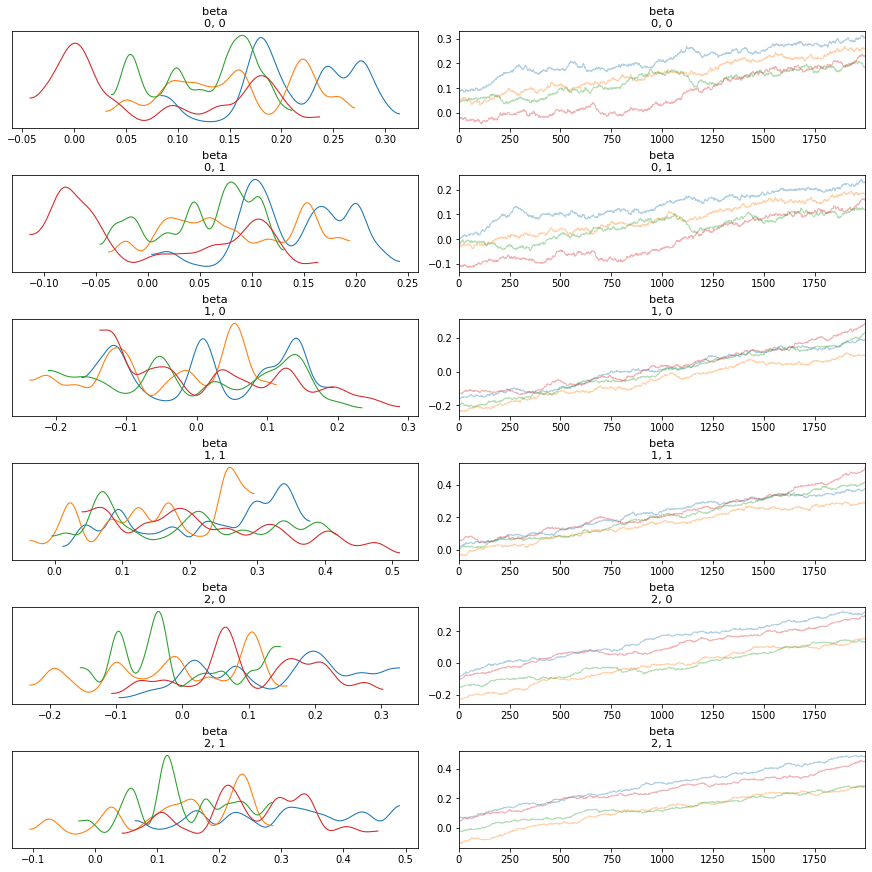

In [72]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)


data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))



dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)


    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

In [73]:
df_results_r1

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
2,Logistic Regression-tain/test dataste,Slice,0.85,0.92,0.60,0.69,<pymc3.model.Model object at 0x7f73e44dbe90>
3,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.77,<pymc3.model.Model object at 0x7f73bb304750>
4,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.82,<pymc3.model.Model object at 0x7f73c5747690>


In [74]:
df_results_r1.tail()

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
2,Logistic Regression-tain/test dataste,Slice,0.85,0.92,0.60,0.69,<pymc3.model.Model object at 0x7f73e44dbe90>
3,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.77,<pymc3.model.Model object at 0x7f73bb304750>
4,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.82,<pymc3.model.Model object at 0x7f73c5747690>


### From the results based on them we see that model with the specific prior on standard scalar transformation dataset performed best. the mean and sd based on dataset

#### We will use this model for further analysis

## Making a MCMC function for our best models

In [75]:
def model_mcmc(sampling):
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
        beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
        
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
        

        trace_s = pm.sample(2000,step)
  

    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
    ep=(1/(1+np.exp(-y_mu)))



    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)


        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-standard scalar-train/test datastet (S)',
                                         'sampling/VI_method':sampling,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

    

    return(model_mclass)

## Making a function for Variational Inference

In [76]:
def model_vi(vi_method):
    
    vi=vi_method
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
        beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
        
        
        
        
    print('for VI')
    with model_mclass:
        mean_field = pm.fit(method=vi_method) # VI
        

    trace_s=mean_field.sample(10000)    



    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
    ep=(1/(1+np.exp(-y_mu)))



    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' MLR-Robust-Nuts-train/test datastet (G)',
                                         'sampling/VI_method':vi_method,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'
    
    
    
    return(model_mclass)

# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 955 seconds.
There were 202 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.597847074651025, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9168405072703238
Logistic Regression accuracy :  0.8375
Logistic Regression accuracy for test data :  0.6
Logistic Regression AUC-ROC for test data :  0.8615360966435185


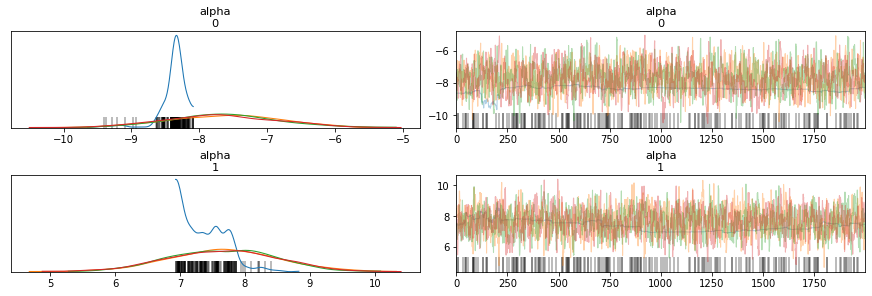

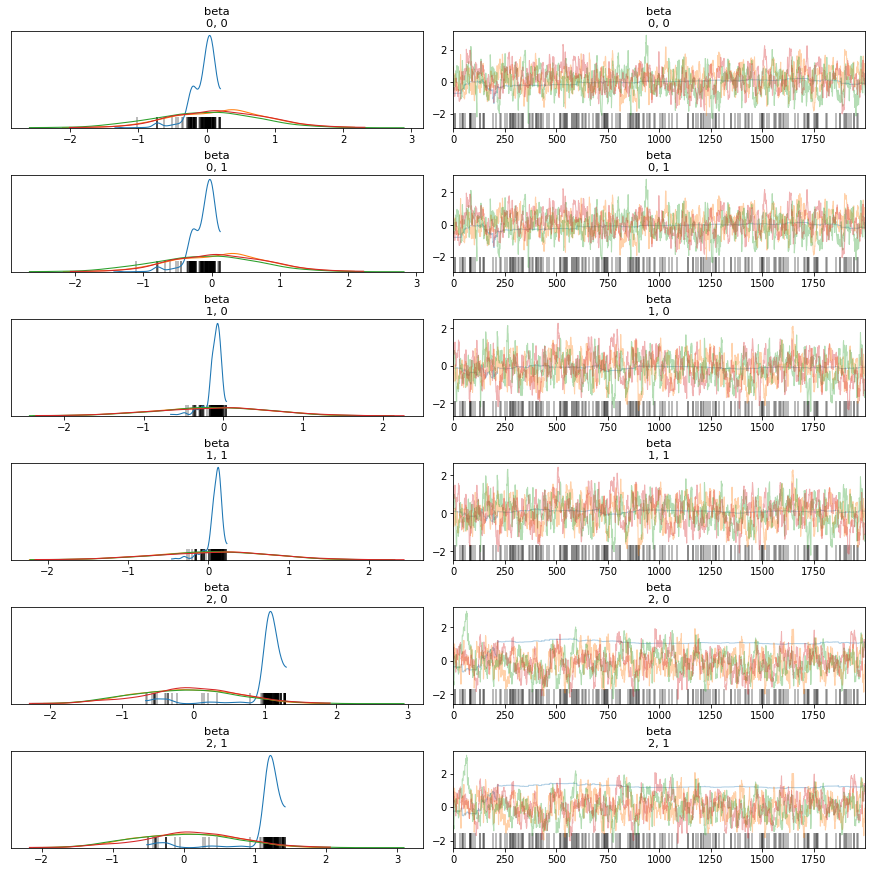

In [77]:
nuts=model_mcmc('NUTS')

In [78]:
model_mclass

In [79]:
df_results_r1.tail()

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
2,Logistic Regression-tain/test dataste,Slice,0.85,0.92,0.60,0.69,<pymc3.model.Model object at 0x7f73e44dbe90>
3,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.77,<pymc3.model.Model object at 0x7f73bb304750>
4,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.82,<pymc3.model.Model object at 0x7f73c5747690>
5,NUTS MLR-standard scalar-train/test datastet (S),NUTS,0.84,0.92,0.60,0.86,<pymc3.model.Model object at 0x7f73def85f90>


## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1160 seconds.
The acceptance probability does not match the target. It is 0.8298315399665946, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8076350305500136, but should be close to 0.65. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Logistic Regression AUC-ROC :  0.9168439496585151
Logistic Regression accuracy :  0.8375
Logistic Regression accuracy for test data :  0.6104166666666667
Logistic Regression AUC-ROC for test data :  0.8974699797453703


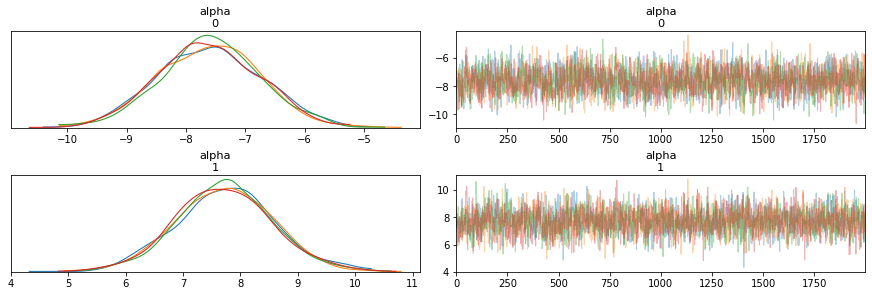

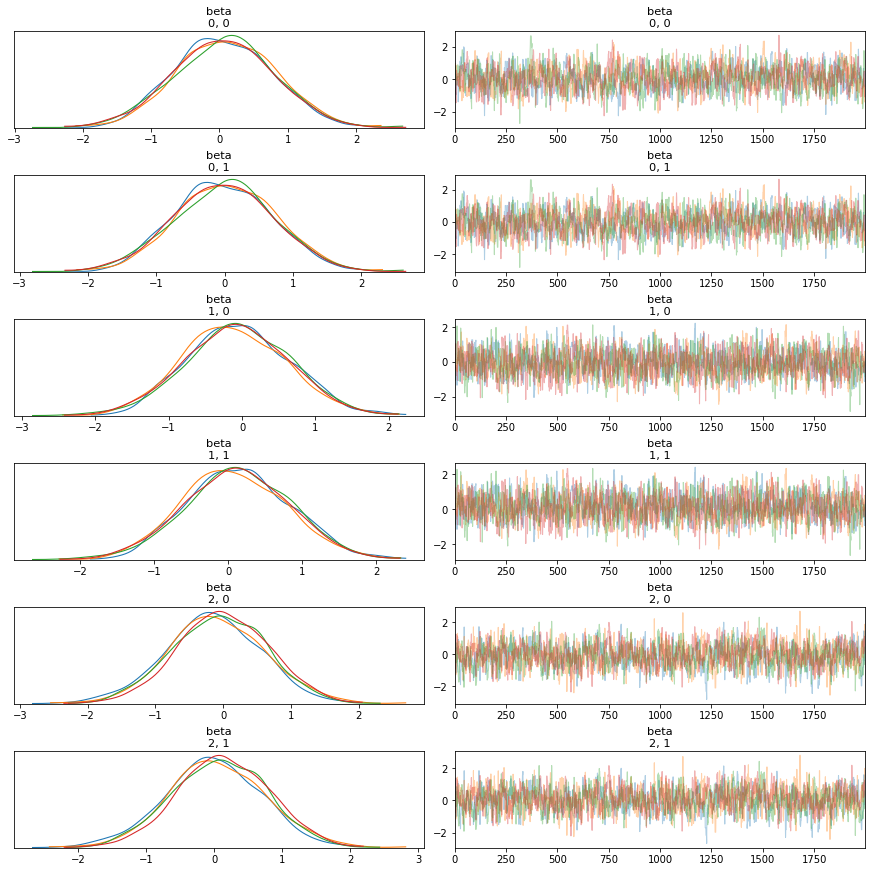

In [80]:
hmc=model_mcmc('HMC')

In [81]:
model_mclass

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9051742536902401
Logistic Regression accuracy :  0.8178571428571428
Logistic Regression accuracy for test data :  0.6020833333333333
Logistic Regression AUC-ROC for test data :  0.868896484375


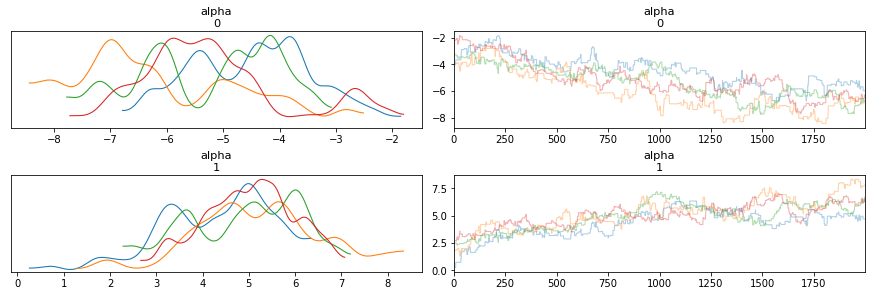

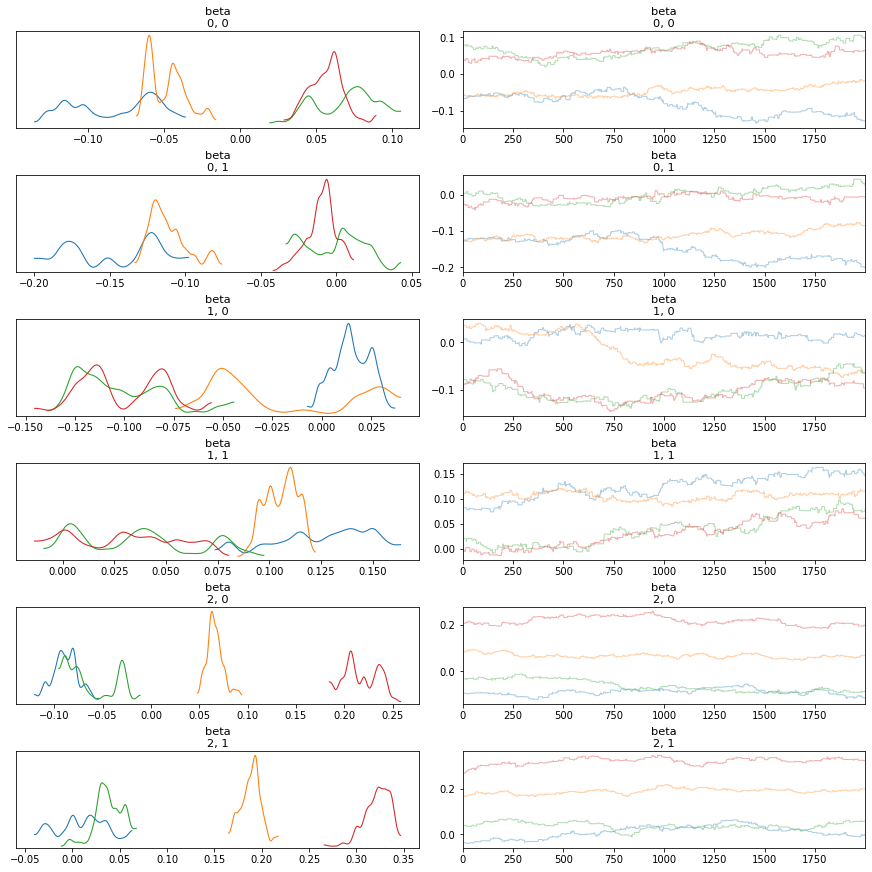

In [82]:
metrolpis=model_mcmc('metropolis')

In [83]:
model_mclass

In [84]:
df_results_r1.tail()

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
3,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.77,<pymc3.model.Model object at 0x7f73bb304750>
4,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.82,<pymc3.model.Model object at 0x7f73c5747690>
5,NUTS MLR-standard scalar-train/test datastet (S),NUTS,0.84,0.92,0.60,0.86,<pymc3.model.Model object at 0x7f73def85f90>
6,HMC MLR-standard scalar-train/test datastet (S),HMC,0.84,0.92,0.61,0.90,<pymc3.model.Model object at 0x7f73c8dba450>
7,metropolis MLR-standard scalar-train/test data...,metropolis,0.82,0.91,0.60,0.87,<pymc3.model.Model object at 0x7f73becd8150>


## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 32 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9179937073143863
Logistic Regression accuracy :  0.8383928571428572
Logistic Regression accuracy for test data :  0.6
Logistic Regression AUC-ROC for test data :  0.7190483940972222


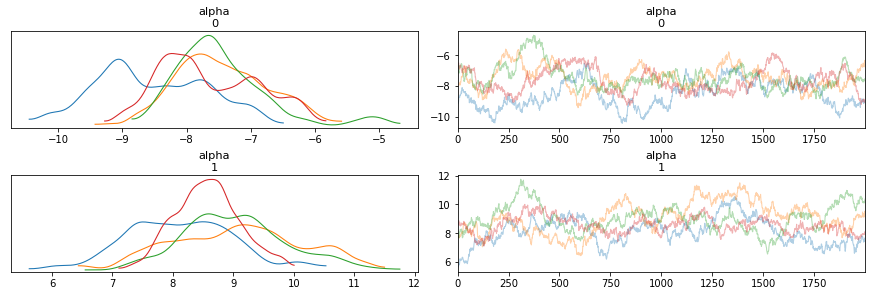

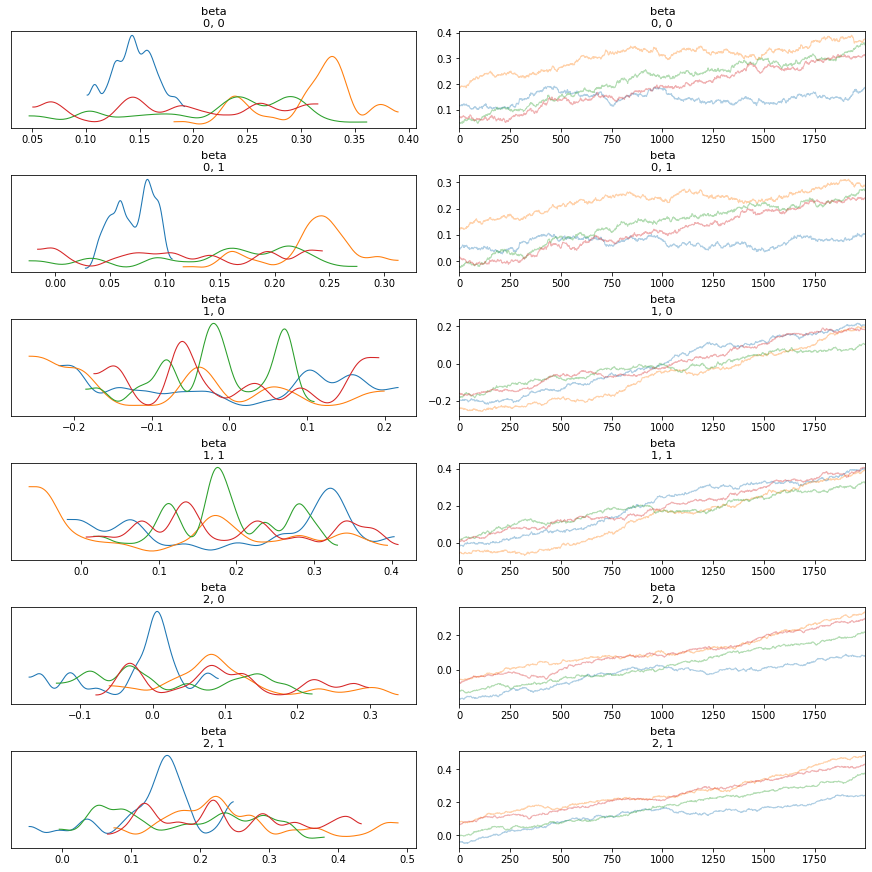

In [85]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 18,436


Logistic Regression AUC-ROC :  0.8488533404935008
Logistic Regression accuracy :  0.6357142857142857
Logistic Regression accuracy for test data :  0.6
Logistic Regression AUC-ROC for test data :  0.8337583188657408


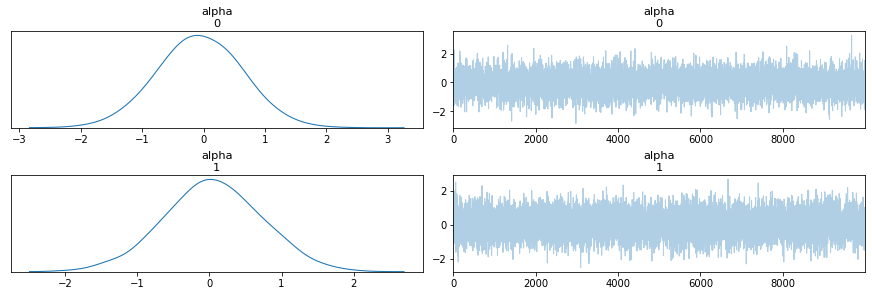

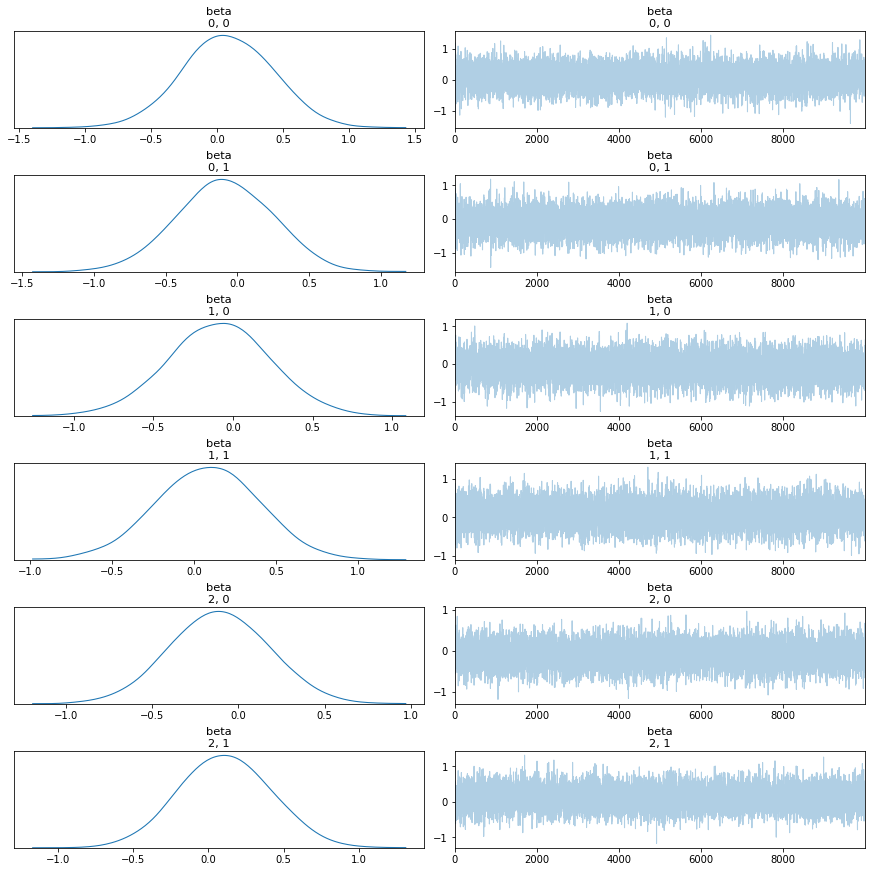

In [86]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 1,831.3


Logistic Regression AUC-ROC :  0.6261996722846441
Logistic Regression accuracy :  0.5196428571428572
Logistic Regression accuracy for test data :  0.5979166666666667
Logistic Regression AUC-ROC for test data :  0.6454083478009259


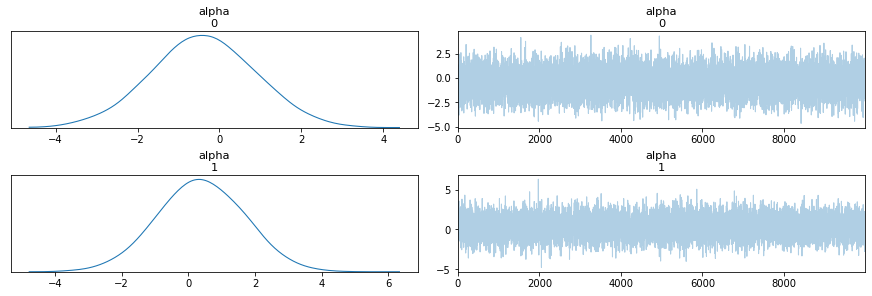

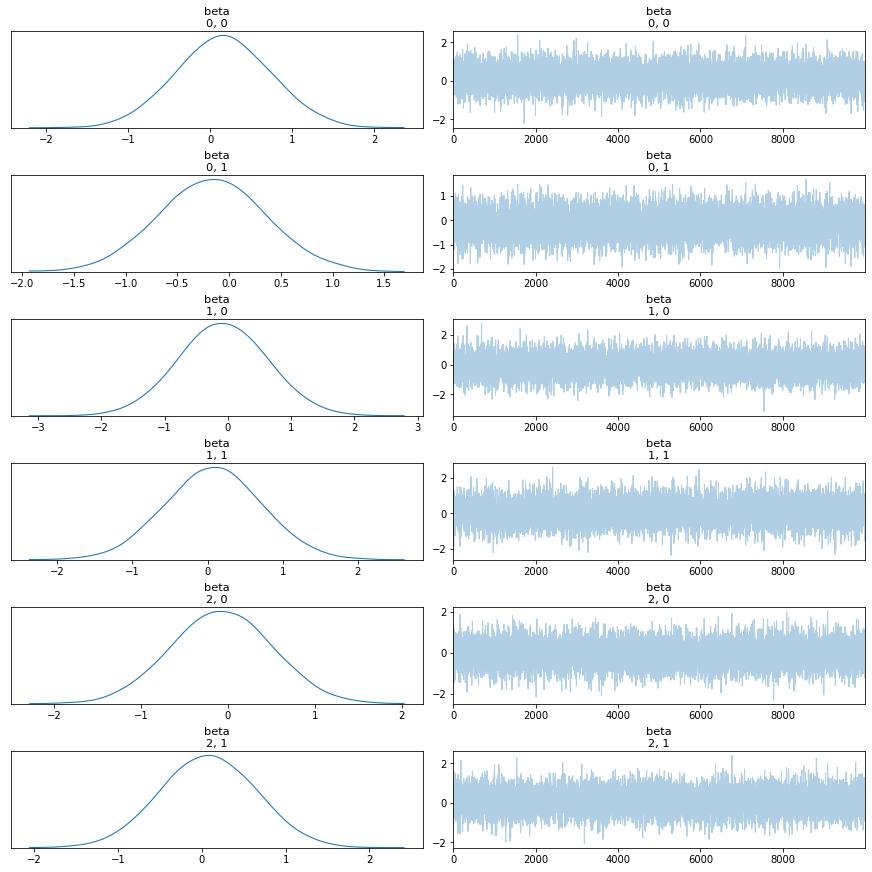

In [87]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


Logistic Regression AUC-ROC :  0.8281129516413308
Logistic Regression accuracy :  0.7133928571428572
Logistic Regression accuracy for test data :  0.675
Logistic Regression AUC-ROC for test data :  0.7164080584490741


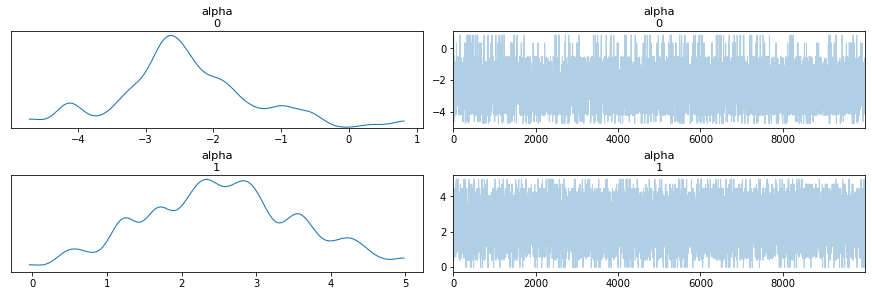

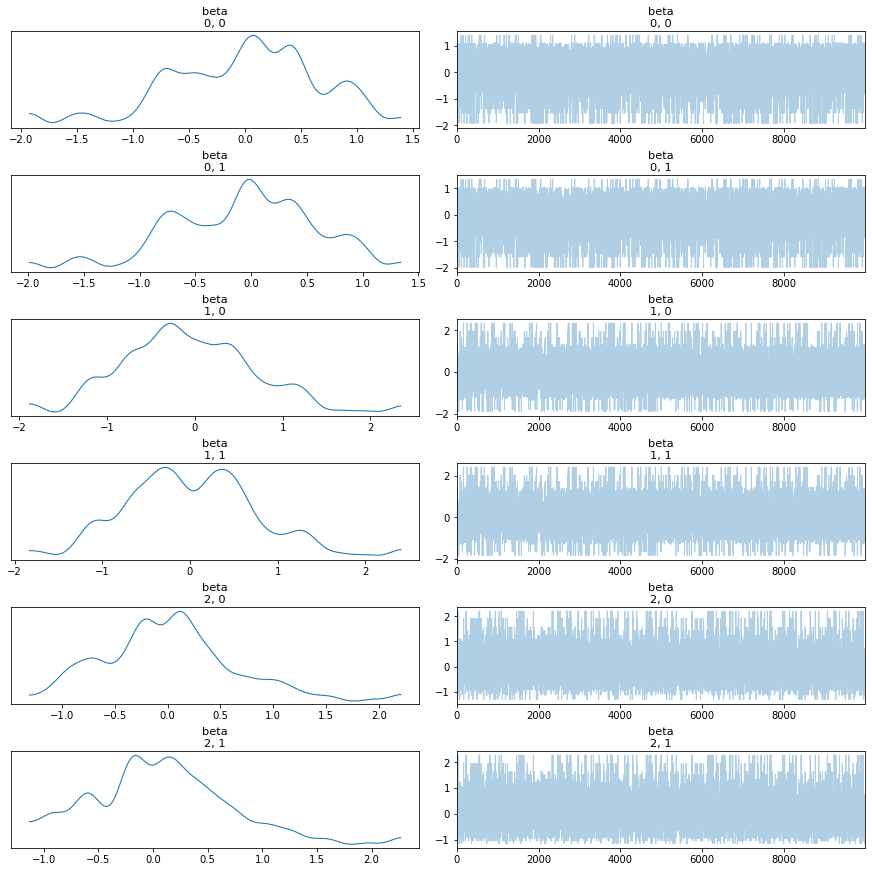

In [88]:
svgd= model_vi('svgd')

In [89]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [90]:
df_results_r1

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
2,Logistic Regression-tain/test dataste,Slice,0.85,0.92,0.60,0.69,<pymc3.model.Model object at 0x7f73e44dbe90>
3,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.77,<pymc3.model.Model object at 0x7f73bb304750>
4,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.82,<pymc3.model.Model object at 0x7f73c5747690>
5,NUTS MLR-standard scalar-train/test datastet (S),NUTS,0.84,0.92,0.60,0.86,<pymc3.model.Model object at 0x7f73def85f90>
6,HMC MLR-standard scalar-train/test datastet (S),HMC,0.84,0.92,0.61,0.90,<pymc3.model.Model object at 0x7f73c8dba450>
7,metropolis MLR-standard scalar-train/test datastet (S),metropolis,0.82,0.91,0.60,0.87,<pymc3.model.Model object at 0x7f73becd8150>
8,slice MLR-standard scalar-train/test datastet (S),slice,0.84,0.92,0.60,0.72,<pymc3.model.Model object at 0x7f73bd626f90>
9,advi MLR-Robust-Nuts-train/test datastet (G),advi,0.64,0.85,0.60,0.83,<pymc3.model.Model object at 0x7f73bd114210>


In [92]:
df_results_r1

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
2,Logistic Regression-tain/test dataste,Slice,0.85,0.92,0.60,0.69,<pymc3.model.Model object at 0x7f73e44dbe90>
3,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.77,<pymc3.model.Model object at 0x7f73bb304750>
4,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.82,<pymc3.model.Model object at 0x7f73c5747690>
5,NUTS MLR-standard scalar-train/test datastet (S),NUTS,0.84,0.92,0.60,0.86,<pymc3.model.Model object at 0x7f73def85f90>
6,HMC MLR-standard scalar-train/test datastet (S),HMC,0.84,0.92,0.61,0.90,<pymc3.model.Model object at 0x7f73c8dba450>
7,metropolis MLR-standard scalar-train/test datastet (S),metropolis,0.82,0.91,0.60,0.87,<pymc3.model.Model object at 0x7f73becd8150>
8,slice MLR-standard scalar-train/test datastet (S),slice,0.84,0.92,0.60,0.72,<pymc3.model.Model object at 0x7f73bd626f90>
9,advi MLR-Robust-Nuts-train/test datastet (G),advi,0.64,0.85,0.60,0.83,<pymc3.model.Model object at 0x7f73bd114210>


In [93]:
df_results_r1_a=df_results_r1.sort_values('Accuracy_test',ascending=False)

df_results_r1_a


,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
11,svgd MLR-Robust-Nuts-train/test datastet (G),svgd,0.71,0.83,0.68,0.72,<pymc3.model.Model object at 0x7f73bef84890>
6,HMC MLR-standard scalar-train/test datastet (S),HMC,0.84,0.92,0.61,0.90,<pymc3.model.Model object at 0x7f73c8dba450>
7,metropolis MLR-standard scalar-train/test datastet (S),metropolis,0.82,0.91,0.60,0.87,<pymc3.model.Model object at 0x7f73becd8150>
2,Logistic Regression-tain/test dataste,Slice,0.85,0.92,0.60,0.69,<pymc3.model.Model object at 0x7f73e44dbe90>
3,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.77,<pymc3.model.Model object at 0x7f73bb304750>
4,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.82,<pymc3.model.Model object at 0x7f73c5747690>
5,NUTS MLR-standard scalar-train/test datastet (S),NUTS,0.84,0.92,0.60,0.86,<pymc3.model.Model object at 0x7f73def85f90>
8,slice MLR-standard scalar-train/test datastet (S),slice,0.84,0.92,0.60,0.72,<pymc3.model.Model object at 0x7f73bd626f90>


In [94]:
df_results_r1_a=df_results_r1.sort_values('AUC-ROC_test',ascending=False)

df_results_r1_a

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
1,Logistic Regression-tain/test dataste,NA,0.85,0.92,0.81,0.91,LogisticRegression()
6,HMC MLR-standard scalar-train/test datastet (S),HMC,0.84,0.92,0.61,0.90,<pymc3.model.Model object at 0x7f73c8dba450>
7,metropolis MLR-standard scalar-train/test datastet (S),metropolis,0.82,0.91,0.60,0.87,<pymc3.model.Model object at 0x7f73becd8150>
5,NUTS MLR-standard scalar-train/test datastet (S),NUTS,0.84,0.92,0.60,0.86,<pymc3.model.Model object at 0x7f73def85f90>
9,advi MLR-Robust-Nuts-train/test datastet (G),advi,0.64,0.85,0.60,0.83,<pymc3.model.Model object at 0x7f73bd114210>
4,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.82,<pymc3.model.Model object at 0x7f73c5747690>
3,Logistic Regression-tain/test dataste,Slice,0.84,0.92,0.60,0.77,<pymc3.model.Model object at 0x7f73bb304750>
8,slice MLR-standard scalar-train/test datastet (S),slice,0.84,0.92,0.60,0.72,<pymc3.model.Model object at 0x7f73bd626f90>
11,svgd MLR-Robust-Nuts-train/test datastet (G),svgd,0.71,0.83,0.68,0.72,<pymc3.model.Model object at 0x7f73bef84890>


In [95]:
# save the final data
df_results_r1_a.to_csv('df_results_c5.csv',index=False)

## Conclusion

#### We can see that both MCMC have performed better than VI models
#### Also we see the performance of MCMC is at par and a bit better than normal Logistic Regression
#### HMC method  gave best result in MCMC model